In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

# Fungiflow pipeline testing plots

This Notebook will plot some of the results from the full Fungiflow pipeline of synthetic short read data versus the original reference assemblies. This dataset is comprised of 10 fungi of differing taxonomy, lifestyles, assembly sizes, and assembly construction, for which synthetic readsets were generated using `ART` read simulator software for 6 different levels of read coverage.

### Notes:
- All datasets were assembled using 24 CPUS (AMD EPYC 7742 64-Core Processor) and 100 GB of memory
- Needed to use the `--careful` parameter for the *Rhizophagus irregularis* DAOM 197198 read sets for successful `SPADes` assembly of the reads as it would run out of memory. This is likely due to the large genome size of *R. irregularis*, which `SPAdes` is not designed to assemble

| Species                 | Strain      | RefSeq accession | Sequencing technology | Genome size (Mbp) | Lifestyle                   | Reference                             |
|-------------------------|-------------|------------------|-----------------------|-------------------|-----------------------------|---------------------------------------|
| *Aspergillus nidulans*    | FGSC A4     | GCF_000011425    | Illumina              | 29.8              | saprohpytic                 | Wortman et al., 2009.                 |
| *Candida albicans*        | SC5314      | GCF_000182965    | Illumina GAIIx        | 14.3              | human gut commensal         | Muzzey, Schwartz, and Sherlock, 2013. |
| *Penicillium expansum*    | MD-8        | GCF_000769745    | Illumina HiSeq        | 32.4              | saprohpytic                 | Ballester et al., 2015.               |
| *Magnaporthe oryzae*      | 70-15       | GCF_000002495    | Sanger ABI            | 41                | plant pathogen (rice blast) | Dean et al., 2005.                    |
| *Fusarium oxysporum*      | NRRL 32931  | GCF_000271745    | Illumina              | 47.9              | human pathogenic            | Zhang et al., 2020.                   |
| *Trichoderma reesei*      | QM6a        | GCF_000167675    | Sanger                | 33.4              | saprohpytic                 | Martinez et al., 2008.                |
| *Xylaria bambusicola*     | CBS 139988  | GCF_022495145    | Illumina              | 38.7              | plant endophytic            | Franco et al., 2022.                  |
| *Rhizophagus irregularis* | DAOM 197198 | GCF_000439145    | Illumina HiSeq        | 136.7             | arbuscular mycorrhizal      | Chen et al., 2018.                    |
| *Ustilago maydis*         | 521         | GCF_000328475    | Sanger                | 19.7              | plant pathogen (corn smut)  | Kämper et al., 2006.                  |
| *Tremella mesenterica*    | Fries       | GCF_000271645    | Sanger                | 28.6              | saprohpytic                 | Floudas et al., 2012.                 |

In [2]:
df0 = pd.read_csv("master_results.csv")
df = df0[df0["Assembly"] != "reference"]
df.head()

,Assembly,Genome,Name,Coverage,CPU Efficiency (%),Memory Efficiency (%),Job Wall-clock time,# contigs (>= 0 bp),# contigs (>= 1000 bp),# contigs (>= 5000 bp),...,BUSCO - D,BUSCO - F,BUSCO - M,Query,Species,Accession,Identity,Bitscore,E-value,Subject Name
0,1,GCF_000002495,Magnaporthe oryzae 70-15,5,18.65,87.49,03:44:29,9935,7881,2420,...,2 (0.15%),285 (21.72%),72 (5.49%),NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,GCF_000002495,Magnaporthe oryzae 70-15,10,18.43,95.13,04:05:58,1348,1090,658,...,3 (0.23%),22 (1.68%),6 (0.46%),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,GCF_000002495,Magnaporthe oryzae 70-15,25,20.59,53.86,03:58:06,1190,982,566,...,3 (0.23%),20 (1.52%),4 (0.3%),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,GCF_000002495,Magnaporthe oryzae 70-15,50,21.64,95.51,04:23:39,5298,954,555,...,3 (0.23%),21 (1.6%),7 (0.53%),NODE_103_length_77709_cov_5.911719|F|ITS1,NaN,NR_168801,96.032,206.0,2.720000e-51,Dictyochaeta cangshanensis MFLU 18-1614 ITS re...
4,5,GCF_000002495,Magnaporthe oryzae 70-15,75,23.01,93.80,04:45:22,5374,940,549,...,3 (0.23%),19 (1.45%),4 (0.3%),NODE_103_length_77709_cov_8.766789|F|ITS1,NaN,NR_168801,96.032,206.0,2.720000e-51,Dictyochaeta cangshanensis MFLU 18-1614 ITS re...


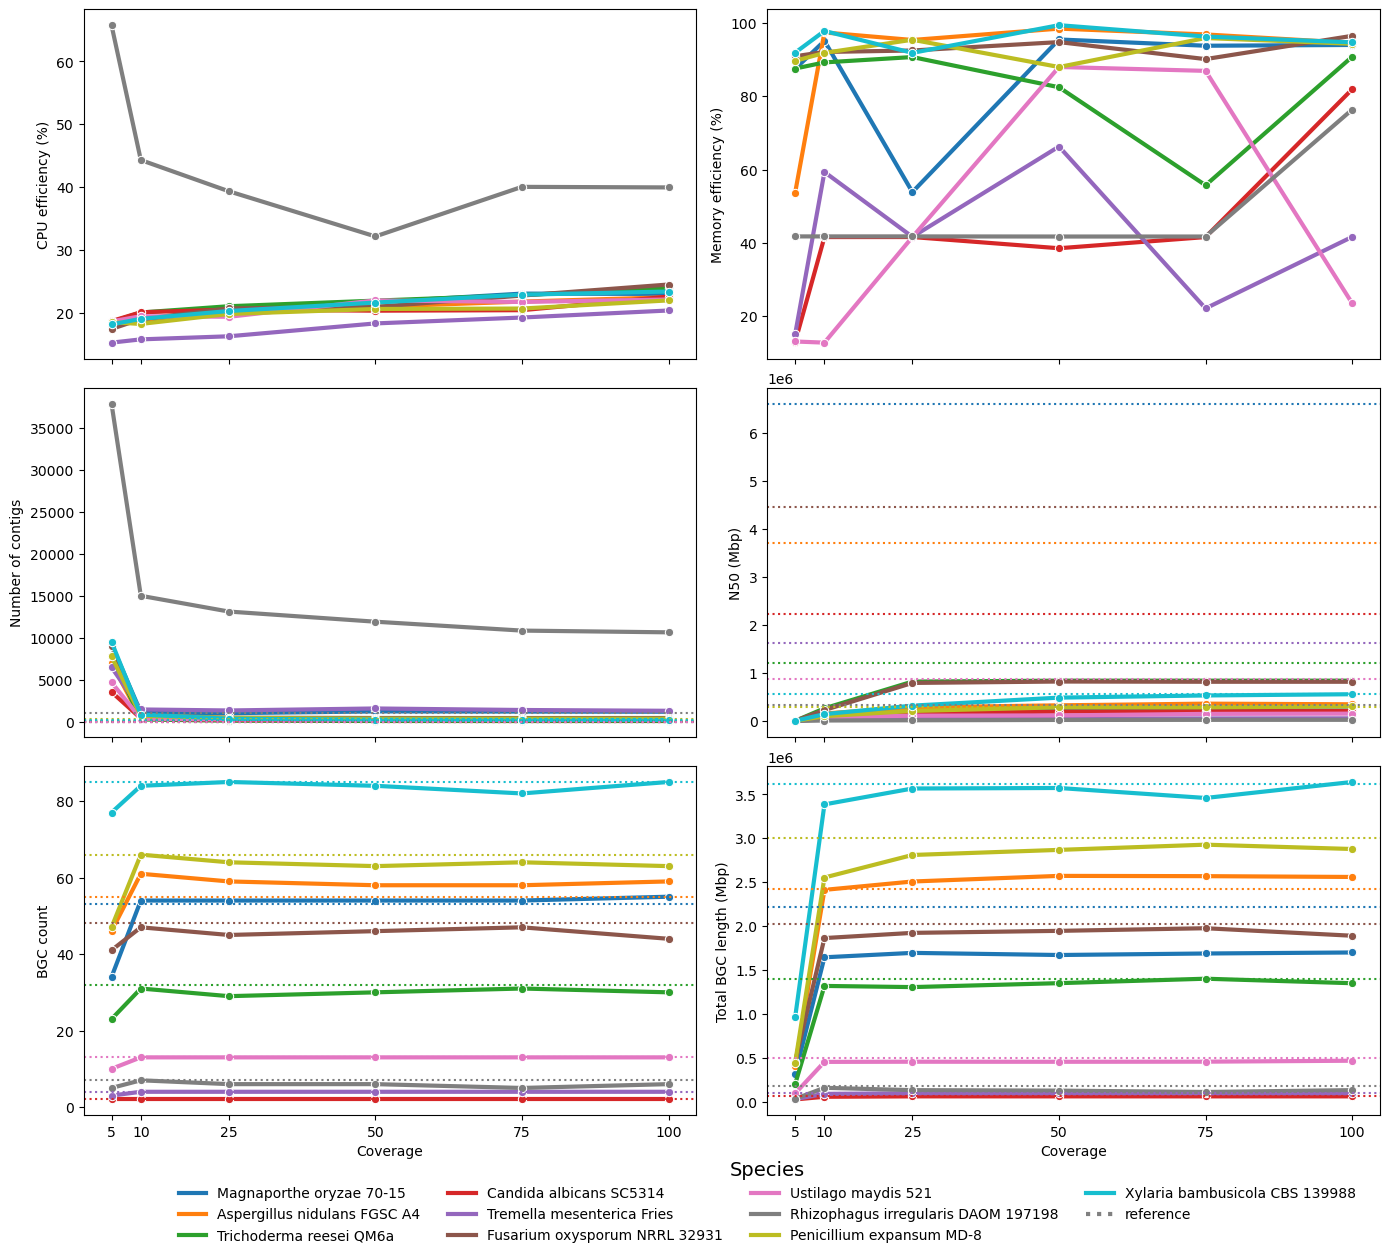

In [3]:
%matplotlib inline

sns.reset_defaults()
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(14, 14))

# Plot each Seaborn plot on a different subplot
sns.lineplot(data=df, x="Coverage", y="CPU Efficiency (%)", hue="Name", ax=axes[0, 0], legend=False, marker="o", linewidth=3)
sns.lineplot(data=df, x="Coverage", y="Memory Efficiency (%)", hue="Name", ax=axes[0, 1], legend=False, marker="o", linewidth=3)
sns.lineplot(data=df, x="Coverage", y="# contigs", hue="Name", ax=axes[1, 0], legend=False, marker="o", linewidth=3)
sns.lineplot(data=df, x="Coverage", y="N50", hue="Name", ax=axes[1, 1], legend=False, marker="o", linewidth=3)
sns.lineplot(data=df, x="Coverage", y="BGC_count", hue="Name", ax=axes[2, 0], legend=False, marker="o", linewidth=3)
sns.lineplot(data=df, x="Coverage", y="total_BGC_length", hue="Name", ax=axes[2, 1], legend=True, marker="o", linewidth=3)

# Get unique values of "align" column
hue_values = df0['Name'].unique()

# Create horizontal lines for each hue
for hue in hue_values:
    reference_value_1_0 = df0[(df0['Name'] == hue) & (df0['Assembly'] == 'reference')]['# contigs'].iloc[0]
    reference_value_1_1 = df0[(df0['Name'] == hue) & (df0['Assembly'] == 'reference')]['N50'].iloc[0]
    reference_value_2_0 = df0[(df0['Name'] == hue) & (df0['Assembly'] == 'reference')]['BGC_count'].iloc[0]
    reference_value_2_1 = df0[(df0['Name'] == hue) & (df0['Assembly'] == 'reference')]['total_BGC_length'].iloc[0]
    axes[1, 0].axhline(y=reference_value_1_0, linestyle='dotted', color=sns.color_palette()[hue_values.tolist().index(hue)])
    axes[1, 1].axhline(y=reference_value_1_1, linestyle='dotted', color=sns.color_palette()[hue_values.tolist().index(hue)])
    axes[2, 0].axhline(y=reference_value_2_0, linestyle='dotted', color=sns.color_palette()[hue_values.tolist().index(hue)])
    axes[2, 1].axhline(y=reference_value_2_1, linestyle='dotted', color=sns.color_palette()[hue_values.tolist().index(hue)])

# Add labels to the subplots
axes[2, 0].set_xlabel("Coverage")
axes[2, 1].set_xlabel("Coverage")

axes[0, 0].set_ylabel("CPU efficiency (%)")
axes[0, 1].set_ylabel("Memory efficiency (%)")
axes[1, 0].set_ylabel("Number of contigs")
axes[1, 1].set_ylabel("N50 (Mbp)")
axes[2, 0].set_ylabel("BGC count")
axes[2, 1].set_ylabel("Total BGC length (Mbp)")

# Adjust the spacing between subplots
fig.tight_layout()
handles, labels = axes[2, 1].get_legend_handles_labels()

# add the custom line to the legend
dotted_line = Line2D([], [], linestyle='dotted', color='grey')
handles.append(dotted_line)
labels.append('reference')

# make sure legend is in figure area
fig.subplots_adjust(top=0.99, bottom=0.2)

# change the line width for the legend
[ha.set_linewidth(3) for ha in handles ]
plt.legend(handles, labels, loc='lower center', borderaxespad=0, frameon=False, \
           bbox_to_anchor=(-0., -0.38), ncol=4, title="Species", title_fontsize='14')

plt.xticks([5, 10, 25, 50, 75, 100], ["5", "10", "25", "50", "75", "100"])
# Show the plot
plt.savefig("synthetic_tests.svg", format="svg", bbox_inches='tight')
plt.show()

### References
ART: a next-generation sequencing read simulator
- Huang, W., Li, L., Myers, J. R., & Marth, G. T. (2011). ART: a next-generation sequencing read simulator. Bioinformatics, 28(4), 593-594. https://doi.org/10.1093/bioinformatics/btr708 

Genomes:
- Wortman, J. R., Gilsenan, J. M., Joardar, V., Deegan, J., Clutterbuck, J., Andersen, M. R., Archer, D., Bencina, M., Braus, G., & Coutinho, P. (2009). The 2008 update of the Aspergillus nidulans genome annotation: a community effort. Fungal Genetics and Biology, 46(1), S2-S13. 
- Muzzey, D., Schwartz, K., Weissman, J. S., & Sherlock, G. (2013). Assembly of a phased diploid Candida albicansgenome facilitates allele-specific measurements and provides a simple model for repeat and indel structure. Genome biology, 14(9), 1-14. 
- Ballester, A.-R., Marcet-Houben, M., Levin, E., Sela, N., Selma-Lázaro, C., Carmona, L., Wisniewski, M., Droby, S., González-Candelas, L., & Gabaldón, T. (2015). Genome, transcriptome, and functional analyses of Penicillium expansum provide new insights into secondary metabolism and pathogenicity. Molecular plant-microbe interactions, 28(3), 232-248. 
- Dean, R. A., Talbot, N. J., Ebbole, D. J., Farman, M. L., Mitchell, T. K., Orbach, M. J., Thon, M., Kulkarni, R., Xu, J.-R., & Pan, H. (2005). The genome sequence of the rice blast fungus Magnaporthe grisea. Nature, 434(7036), 980-986. 
- Zhang, Y., Yang, H., Turra, D., Zhou, S., Ayhan, D. H., DeIulio, G. A., Guo, L., Broz, K., Wiederhold, N., Coleman, J. J., Donnell, K. O., Youngster, I., McAdam, A. J., Savinov, S., Shea, T., Young, S., Zeng, Q., Rep, M., Pearlman, E., Schwartz, D. C., Di Pietro, A., Kistler, H. C., & Ma, L.-J. (2020). The genome of opportunistic fungal pathogen Fusarium oxysporum carries a unique set of lineage-specific chromosomes. Communications biology, 3(1), 50. https://doi.org/10.1038/s42003-020-0770-2 
- Martinez, D., Berka, R. M., Henrissat, B., Saloheimo, M., Arvas, M., Baker, S. E., Chapman, J., Chertkov, O., Coutinho, P. M., & Cullen, D. (2008). Genome sequencing and analysis of the biomass-degrading fungus Trichoderma reesei (syn. Hypocrea jecorina). Nature Biotechnology, 26(5), 553-560. 
- Franco, M. E., Wisecaver, J. H., Arnold, A. E., Ju, Y. M., Slot, J. C., Ahrendt, S., Moore, L. P., Eastman, K. E., Scott, K., & Konkel, Z. (2022). Ecological generalism drives hyperdiversity of secondary metabolite gene clusters in xylarialean endophytes. New phytologist, 233(3), 1317-1330. 
- Chen, E. C., Morin, E., Beaudet, D., Noel, J., Yildirir, G., Ndikumana, S., Charron, P., St‐Onge, C., Giorgi, J., & Krüger, M. (2018). High intraspecific genome diversity in the model arbuscular mycorrhizal symbiont Rhizophagus irregularis. New phytologist, 220(4), 1161-1171. 
- Kämper, J., Kahmann, R., Bölker, M., Ma, L.-J., Brefort, T., Saville, B. J., Banuett, F., Kronstad, J. W., Gold, S. E., & Müller, O. (2006). Insights from the genome of the biotrophic fungal plant pathogen Ustilago maydis. Nature, 444(7115), 97-101. 
- Floudas, D., Binder, M., Riley, R., Barry, K., Blanchette, R. A., Henrissat, B., Martínez, A. T., Otillar, R., Spatafora, J. W., Yadav, J. S., Aerts, A., Benoit, I., Boyd, A., Carlson, A., Copeland, A., Coutinho, P. M., de Vries, R. P., Ferreira, P., Findley, K., Foster, B., Gaskell, J., Glotzer, D., Górecki, P., Heitman, J., Hesse, C., Hori, C., Igarashi, K., Jurgens, J. A., Kallen, N., Kersten, P., Kohler, A., Kües, U., Kumar, T. K. A., Kuo, A., LaButti, K., Larrondo, L. F., Lindquist, E., Ling, A., Lombard, V., Lucas, S., Lundell, T., Martin, R., McLaughlin, D. J., Morgenstern, I., Morin, E., Murat, C., Nagy, L. G., Nolan, M., Ohm, R. A., Patyshakuliyeva, A., Rokas, A., Ruiz-Dueñas, F. J., Sabat, G., Salamov, A., Samejima, M., Schmutz, J., Slot, J. C., St. John, F., Stenlid, J., Sun, H., Sun, S., Syed, K., Tsang, A., Wiebenga, A., Young, D., Pisabarro, A., Eastwood, D. C., Martin, F., Cullen, D., Grigoriev, I. V., & Hibbett, D. S. (2012). The Paleozoic Origin of Enzymatic Lignin Decomposition Reconstructed from 31 Fungal Genomes. science, 336(6089), 1715-1719. https://doi.org/doi:10.1126/science.1221748 

